# Calibrate a CdS Photoresistor

## Student Team: Replace the data below with yours!

* **Team number:** 999
* **Student A:** 
  * Name: Albert Einstein
  * MatNo: 123456
* **Student B:** 
  * Name: Bertrand Russell
  * MatNo: 654321
* **Student C:** 
  * Name: Carl Friedrich Gauss
  * MatNo: 314159


## Background
https://en.wikipedia.org/wiki/Photoresistor

In [58]:
import pandas as pd
import numpy as np
from numpy import log10
from numpy.random import normal
import matplotlib.pyplot as plt
from ipywidgets import interactive
# ipywidgets

## Data Files

[Hallo](./data/Delta_V1.txt)

## LDR Resistance Model: Power Function

The following simple power function is used to approximate the behaviour of a LDR.

In [23]:
def LDRmodel(lux, m=-0.57, b=2.71e4):
    return b*lux**m

In [24]:
LDRmodel(0.1)

100686.04708533375

In [25]:
log10(LDRmodel(0.1))

5.002969290874406

## Logarithmic Illuminance Values for the Evaluation

The illuminance of the usual lighting conditions from moonlit night to full sunlight covers several orders of magnitude. Therefore, it is obvious to examine the illuminance on a logarithmic scale.

In [26]:
lux = np.logspace(-1,3)
lux

array([1.00000000e-01, 1.20679264e-01, 1.45634848e-01, 1.75751062e-01,
       2.12095089e-01, 2.55954792e-01, 3.08884360e-01, 3.72759372e-01,
       4.49843267e-01, 5.42867544e-01, 6.55128557e-01, 7.90604321e-01,
       9.54095476e-01, 1.15139540e+00, 1.38949549e+00, 1.67683294e+00,
       2.02358965e+00, 2.44205309e+00, 2.94705170e+00, 3.55648031e+00,
       4.29193426e+00, 5.17947468e+00, 6.25055193e+00, 7.54312006e+00,
       9.10298178e+00, 1.09854114e+01, 1.32571137e+01, 1.59985872e+01,
       1.93069773e+01, 2.32995181e+01, 2.81176870e+01, 3.39322177e+01,
       4.09491506e+01, 4.94171336e+01, 5.96362332e+01, 7.19685673e+01,
       8.68511374e+01, 1.04811313e+02, 1.26485522e+02, 1.52641797e+02,
       1.84206997e+02, 2.22299648e+02, 2.68269580e+02, 3.23745754e+02,
       3.90693994e+02, 4.71486636e+02, 5.68986603e+02, 6.86648845e+02,
       8.28642773e+02, 1.00000000e+03])

## Simulated Noisy Illuminance Measurements (lux + noise)

We assume that the measurement of illuminance is inaccurate and susceptible to noise. To model this behaviour we adding a Gaussian random error to each data point with a standard deviation dependent on the expected ("correct") lux value. 

In [27]:
# Each value of lux is dithered with a normally distributed error with a stddev of s*lux 
s = 0.1 # 10% stddev
lux_w_err = normal(loc=lux, scale=s*lux)

[]

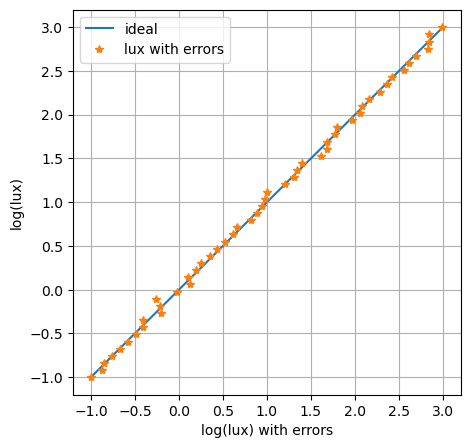

In [28]:
fig,ax = plt.subplots(figsize=(5,5))
ax.plot(log10(lux), log10(lux),label="ideal")
ax.plot(log10(lux_w_err), log10(lux),"*", label="lux with errors")
ax.legend()
ax.grid(True)
ax.set_xlabel("log(lux) with errors")
ax.set_ylabel("log(lux)")
plt.plot()

##Voltage Divider##

The LDR is connected on one side to the power supply and on the other side to a resistor $R_1$ whose other terminal is ground. The voltage drop $\Delta V_1$ across $R_1$ is measured.

In [29]:
# voltage drop across a resistor R1 
# circuit: [V0] - R2 - [DV1] - R1 - [GND]
# The node DV1 
def DV1(V0=5,R1=1.e3,R2=1.e3):
    return(R1/(R1+R2)*V0)

In [30]:
DV1()

2.5

## LDR Exercise Setup

The following experiment consists of measurements across a 10K resistor to determine the characteristic curve of the LDR in relation to voltage and luminance.... (can be extended)

<center>
    <img src="./images/LDR-setup.png"/>
    <br>
    <i>LDR Exercise Setup</i>
</center>

The connection between the LDR and the arduino must be made as follows.


<center>
    <img src="./images/LDR_bb.svg"/>
    <br>
    <i></i>
</center>

<center>
    <img src="./images/LDR_schem.png" width="400px"/>
    <br>
    <i>LDR exercise schematic</i>
</center>

## Measurement points

Voltage measurements must be made across the 10K resistor.

<center>
    <img src="./images/measurement-points.jpg"/>
    <br>
    <i></i>
</center>

## Light Intensity

The light intensity is controlled by means of a dimmer attached to the bulb.

<center>
    <img src="./images/dimmer.jpg" width="300px"/>
    <br>
    <i></i>
</center>

## Data Reading

The data capture is performed manually in a text file with extension `.txt.` in the `data` folder, please follow the format of the example files inside `data`.

1. Position the bulb at a distance of approximately 80cm with respect to the base.
2. Make sure that the LDR and photodetector are centered in relation to the light source.
3. Keep the area free of shadows and the lighting in the room consistent. For this experiment it is recommended to position the case in the direction of the window so that both devices (LDR and Photodetector) are uniformly affected by the outside light.

## Log PLots of LDR Resistance

[]

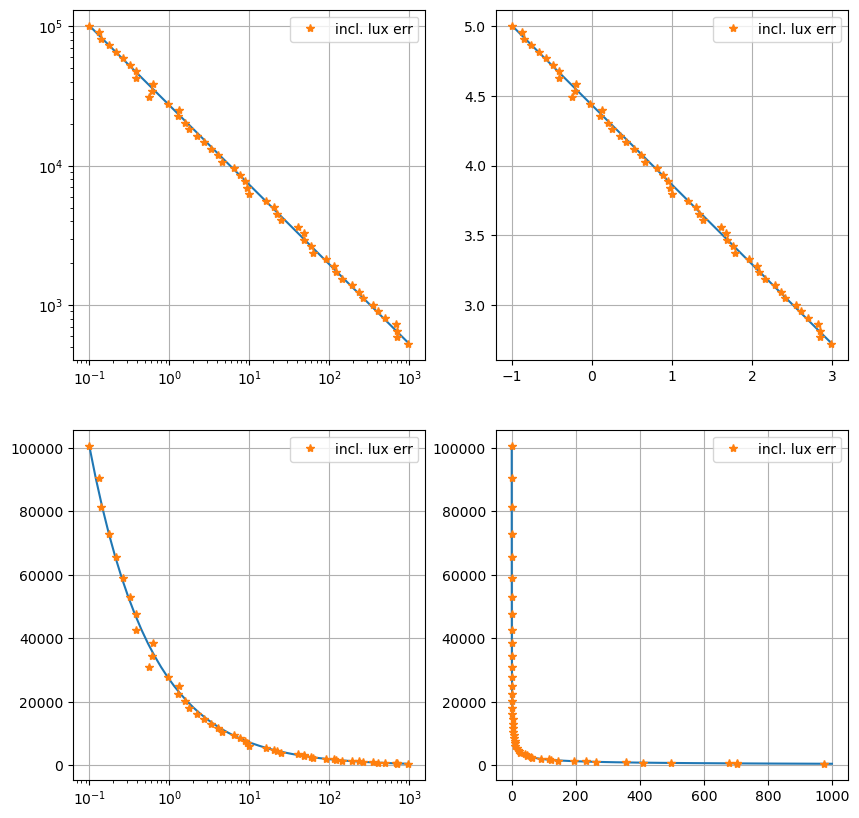

In [31]:
fig1,ax1 = plt.subplots(2,2, figsize=(10,10))
[[ax11, ax12],[ax21, ax22]] = ax1
#[ax11, ax12] = ax1

ax11.loglog(lux,LDRmodel(lux))
ax11.loglog(lux_w_err,LDRmodel(lux),"*", label="incl. lux err")
ax11.legend()

ax12.plot(log10(lux),log10(LDRmodel(lux)))
ax12.plot(log10(lux_w_err),log10(LDRmodel(lux)),"*", label="incl. lux err")
ax12.legend()

ax21.semilogx((lux),LDRmodel(lux))
ax21.semilogx((lux_w_err),LDRmodel(lux),"*", label="incl. lux err")
ax21.legend()

# ax21.plot(log10(lux),LDRmodel(lux))
# ax21.plot(log10(luxerr),LDRmodel(lux),"*", label="incl. lux err")
# ax21.legend()


ax22.plot(lux,LDRmodel(lux))
ax22.plot(lux_w_err,LDRmodel(lux),"*", label="incl. lux err")
ax22.legend()

ax11.grid(True)
ax12.grid(True)
ax21.grid(True)
ax22.grid(True)

plt.plot()

In [32]:
dic = {"lux" : lux_w_err, "LDR": LDRmodel(lux) }

In [33]:
df = pd.DataFrame(dic)
df.set_index("lux", inplace = True)
df.head()

,LDR
lux,
0.099334,100686.047085
0.132247,90456.270657
0.141940,81265.847037
0.175167,73009.177215
0.216650,65591.391119


<AxesSubplot: xlabel='lux'>

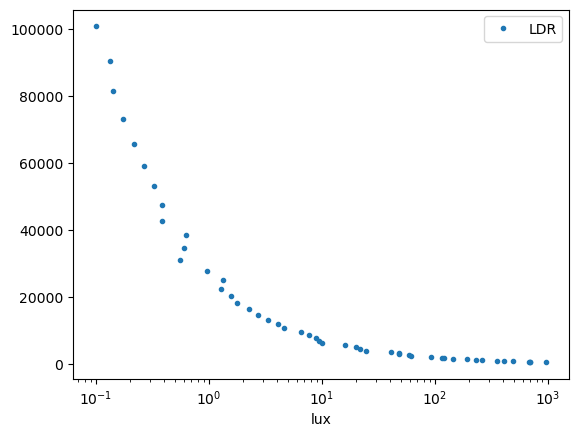

In [34]:
df.plot(logx=True, style=".")

In [35]:
df["DV1"] = DV1(V0=5, R1=10e3, R2=df["LDR"])

<AxesSubplot: xlabel='lux'>

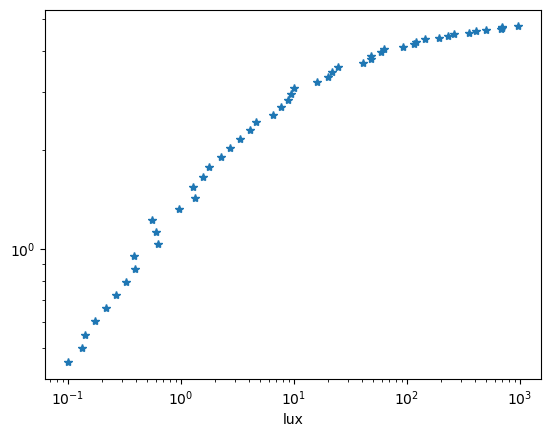

In [36]:
df["DV1"].plot(style="*", logx=True, logy=True)

In [37]:
df.to_csv("./data/Delta_V1.txt")

In [38]:
data = \
'''
X, Y
a, v
2, 4
'''

In [39]:
from io import StringIO
dataIO = StringIO(data)

In [40]:
pd.read_csv(dataIO)

,X,Y
0,a,v
1,2,4


In [111]:
df = pd.read_csv("./data/Delta_V1_V002.txt", index_col=0, skiprows=1)
df.head()

,DV1
Ev,
101,1.466
256,2.240
470,2.740
606,2.940
850,3.190


In [112]:
DV1=df["DV1"]
lux = df.index

<AxesSubplot: xlabel='Ev'>

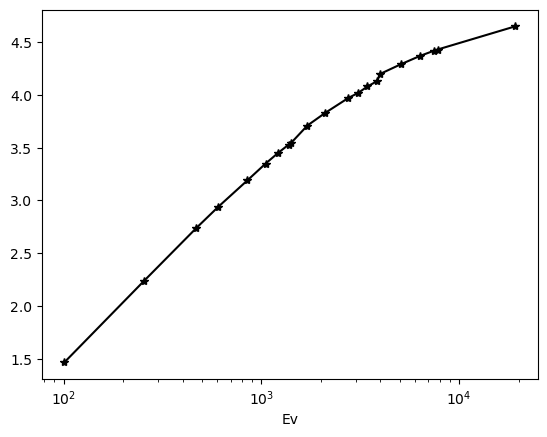

In [115]:
DV1.plot(style="-*", color="k", logx=True)

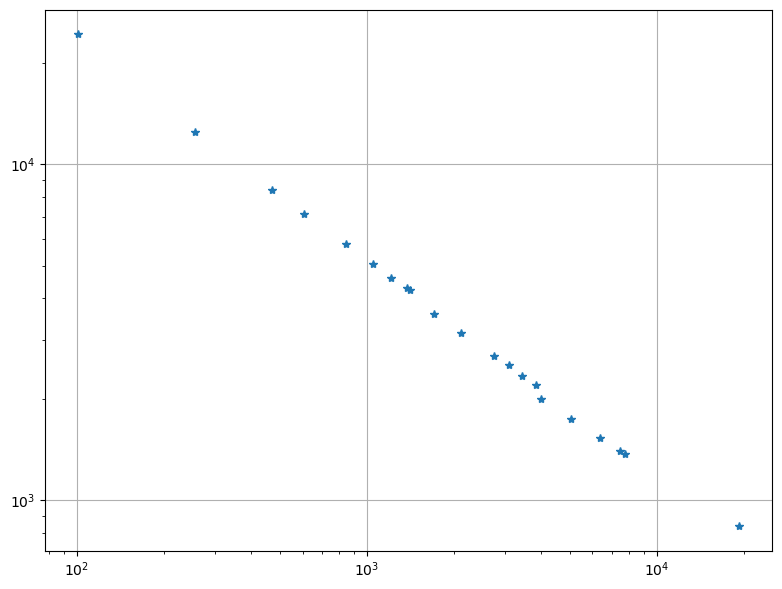

In [116]:
V0=5.04 # V of Arduino

R1 = 10000
DV2 = V0-DV1
LDR = DV2/DV1*R1

fig2,ax2 = plt.subplots(figsize=(8,6))
fig2.tight_layout()

#LDR.plot(style="-*", color="k", logx=True, logy=True, ax = ax2)

ax2.loglog(lux, LDR, "*")
ax2.grid(True)

In [130]:
#def plotter1(V0=5., R1=10000., m=-0.5, b=2.7e4): # parameters with initial values
def plotter1(m=-0.67, b=520.e3): # parameters with initial values
     
    V0 = 5.04
    R1 = 9.91e3
    
    DV2 = V0-DV1
    LDR = DV2/DV1*R1

    fig2,ax2 = plt.subplots(figsize=(8,8))
    #fig2.tight_layout()
    
    ax2.set_xlim(1e1,1e5)

    ax2.set_ylim(1e2,1e5)

    #LDR.plot(style="-*", color="k", logx=True, logy=True, ax = ax2)

    ax2.loglog(lux, LDR, "*")
    ax2.loglog(lux, LDRmodel(lux,m,b), "-")
    
    ax2.grid(True)
        #def LDRmodel(lux, m=-0.57, b=2.71e4):

    #    ax1.set_aspect('equal', 'box')
    #    fig1.tight_layout()

    #    ax1.fill_between([L, 100], [h, h], [0, 0], color = 'y', label="platform")

    #    sx,sy = trajectory(t,v0,theta)
    #    ax1.plot(sx,sy, label=r"$\vec{s}(t)$ trajectory")

In [131]:
# initialize the interactive plot
iplot1 = interactive(
    plotter1, 
#    V0=(0.,10.,0.1),
#    R1=(5000.,15000.,100.),
    m=(-0.8,-0.2,0.01),
    b=(100000., 1000000., 10000.)
)

# start the interactive plot
iplot1

interactive(children=(FloatSlider(value=-0.67, description='m', max=-0.2, min=-0.8, step=0.01), FloatSlider(va…

In [125]:
? pd.read_csv

Signature:
 pd.read_csv(
    filepath_or_buffer: 'FilePath | ReadCsvBuffer[bytes] | ReadCsvBuffer[str]',
    sep: 'str | None | lib.NoDefault' = <no_default>,
    delimiter: 'str | None | lib.NoDefault' = None,
    header: "int | Sequence[int] | None | Literal['infer']" = 'infer',
    names: 'Sequence[Hashable] | None | lib.NoDefault' = <no_default>,
    index_col: 'IndexLabel | Literal[False] | None' = None,
    usecols=None,
    squeeze: 'bool | None' = None,
    prefix: 'str | lib.NoDefault' = <no_default>,
    mangle_dupe_cols: 'bool' = True,
    dtype: 'DtypeArg | None' = None,
    engine: 'CSVEngine | None' = None,
    converters=None,
    true_values=None,
    false_values=None,
    skipinitialspace: 'bool' = False,
    skiprows=None,
    skipfooter: 'int' = 0,
    nrows: 'int | None' = None,
    na_values=None,
    keep_default_na: 'bool' = True,
    na_filter: 'bool' = True,
    verbose: 'bool' = False,
    skip_blank_lines: 'bool' = True,
    parse_dates=None,
    infer_datet